<a href="https://colab.research.google.com/github/dvirchakim/dvirchakim/blob/main/Data_Science_Work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Risk Predictive Analysis**
### First submission in data science course  semester B 

Konsary Itamar - 316126853 ,
Chakim Dvir - 205654445

import relevant libraries 

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

loading data 

In [165]:
data= pd.read_csv('Work1DB.csv')

View data

In [166]:
data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


sorting by num , alpha numeric ,etc...

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [168]:
print("Data Shape ", data.shape)

Data Shape  (5110, 12)


In [169]:
data.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


As described the data is sorted by numeric values such as float64,int64 .

On the other hand we have an object based values which represent alpha numeric values.

# *Label Encoding*

In [170]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(data['gender'])

smoking_status=enc.fit_transform(data['smoking_status'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])

data['work_type']=work_type
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender


In [171]:
print(gender)
print(smoking_status)
print(work_type)
print( Residence_type)
print(ever_married)


[1 0 1 ... 0 1 0]
[1 2 2 ... 2 1 0]
[2 3 2 ... 3 2 0]
[1 0 0 ... 0 0 1]
[1 1 1 ... 1 1 1]


present label encoded data 

In [172]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# *One-Hot Encoding*

In [173]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(data[['gender']]).toarray()
gender_encoded = pd.DataFrame(gender_encoded, columns=['female', 'male', 'other'])

smoking_status_encoded = encoder.fit_transform(data[['smoking_status']]).toarray()
smoking_status_encoded = pd.DataFrame(smoking_status_encoded, columns=['formerly smoked', 'never smoked', 'smokes', 'unknown'])

work_type_encoded = encoder.fit_transform(data[['work_type']]).toarray()
work_type_encoded = pd.DataFrame(work_type_encoded, columns=['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'])

residence_type_encoded = encoder.fit_transform(data[['Residence_type']]).toarray()
residence_type_encoded = pd.DataFrame(residence_type_encoded, columns=['Rural', 'Urban'])

ever_married_encoded = encoder.fit_transform(data[['ever_married']]).toarray()
ever_married_encoded = pd.DataFrame(ever_married_encoded, columns=['married', 'not married'])

data = pd.concat([data, gender_encoded, smoking_status_encoded, work_type_encoded, residence_type_encoded, ever_married_encoded], axis=1)

data.drop(['gender', 'smoking_status', 'work_type', 'Residence_type', 'ever_married'], axis=1, inplace=True)


present data organized by one-hot encoding 

In [174]:
data.sample(20)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,female,male,other,...,unknown,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,married,not married
2373,43090,62.0,1,0,74.32,34.0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3494,10323,66.0,0,0,112.77,22.7,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3936,52792,39.0,0,0,62.02,23.7,0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
625,21886,40.0,0,0,71.20,27.1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
693,51514,13.0,0,0,131.51,41.7,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1164,53276,49.0,0,0,67.55,17.6,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
438,67177,53.0,0,0,116.66,28.5,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3322,9955,58.0,0,0,83.93,25.6,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4759,41527,46.0,0,0,59.74,29.5,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1377,40144,32.0,0,0,93.17,27.5,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Both One-Hot Encoding and Label Encoding are techniques used to convert categorical variables into numerical variables that can be used as input for machine learning models.

***Main differences are -***

***Label Encoding*** assigns a unique integer value to each category in a column
as seen on coloum [39]

***One-Hot Encoding*** creates new binary columns for each category in a column. Each row is then assigned a value of 1 in the column corresponding to its category, and 0 in all other columns
as seen on coloum [50]

when shall we use each method?
**One-Hot Encoding** is preferred over Label Encoding when dealing with nominal categorical variables, where the categories have no inherent order, and each category is equally important. 

**Label Encoding** may be useful for ordinal categorical variables, where the categories have a natural ordering



now for the plotting sequence - 

(note that before using the plotting sequence run the label encoding for matching templates)

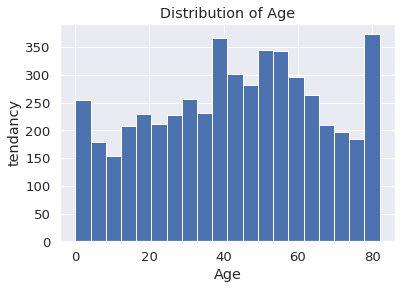

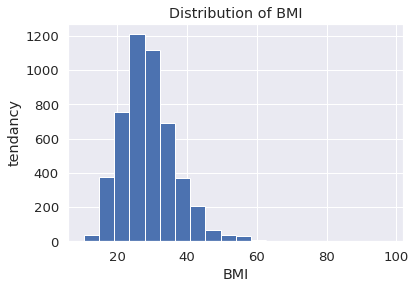

KeyError: ignored

In [175]:

#age distribution
plt.hist(data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('tendancy')
plt.title('Distribution of Age')
plt.show()

# BMI distribution
plt.hist(data['bmi'], bins=20)
plt.xlabel('BMI')
plt.ylabel('tendancy')
plt.title('Distribution of BMI')
plt.show()

#gender distribution
plt.bar(data['gender'].unique(), data['gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('tendancy')
plt.title('Distribution of Gender')
plt.show()

#smoking status distribution
plt.bar(data['smoking_status'].unique(), data['smoking_status'].value_counts())
plt.xlabel('Smoking Status')
plt.ylabel('tendancy')
plt.title('Distribution of Smoking Status')
plt.show()

# work type distribution
plt.bar(data['work_type'].unique(), data['work_type'].value_counts())
plt.xlabel('Work Type')
plt.ylabel('tendancy')
plt.title('Distribution of Work Type')
plt.show()

# residence type distribution
plt.bar(data['Residence_type'].unique(), data['Residence_type'].value_counts())
plt.xlabel('Residence Type')
plt.ylabel('tendancy')
plt.title('Distribution of Residence Type')
plt.show()

# ever married distribution
plt.bar(data['ever_married'].unique(), data['ever_married'].value_counts())
plt.xlabel('Ever Married')
plt.ylabel('tendancy')
plt.title('Distribution of Ever Married')
plt.show()


now we'll search for null values 

In [176]:
data.isnull().sum()

id                     0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
stroke                 0
female                 0
male                   0
other                  0
formerly smoked        0
never smoked           0
smokes                 0
unknown                0
Govt_job               0
Never_worked           0
Private                0
Self-employed          0
children               0
Rural                  0
Urban                  0
married                0
not married            0
dtype: int64

As seen BMI has 201 null values

now lets outpot a short descirption of bmi

In [177]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

count match for missing values 

null values fix

In [178]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)


validation

In [179]:
data.isnull().sum()

id                   0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
female               0
male                 0
other                0
formerly smoked      0
never smoked         0
smokes               0
unknown              0
Govt_job             0
Never_worked         0
Private              0
Self-employed        0
children             0
Rural                0
Urban                0
married              0
not married          0
dtype: int64

Bmi null values fixed 

In [ ]:
corr_matrix = data.corr()
data.columns = data.columns.str.replace('_', ' ')
corr_matrix = data.corr().round(1)

plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Generated heat map according to categorial values and standard diviation
added a decimal point limit and underscore visibilty fix.

now lets show a corolaized categories with stroke probailty 

In [180]:
corr_matrix = data.corr()

# Identify correlated columns
correlated_cols = []
uncorrelated_cols = []

for col in corr_matrix:
    if corr_matrix[col].abs().nlargest(2).values[1] >= 0.05:
        correlated_cols.append(col)
    else:
        uncorrelated_cols.append(col)

# Print the list of correlated and uncorrelated columns
print('Correlated columns:', correlated_cols)
print('Uncorrelated columns:', uncorrelated_cols)

Correlated columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'female', 'male', 'formerly smoked', 'never smoked', 'smokes', 'unknown', 'Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children', 'Rural', 'Urban', 'married', 'not married']
Uncorrelated columns: ['id', 'other']


To apply division first we'll seperate our stroke data 

In [181]:
X = data.drop('stroke', axis=1)
y = data['stroke']


Split the data into training, validation, and test sets

In [182]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=1)


Train the KNN
(notice that one hot label should run in order to get valid values)

In [183]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions

In [184]:
y_pred = knn.predict(X_val)

Evaluate

In [185]:
accuracy = accuracy_score(y_val, y_pred)


print outcome

In [186]:
print('Validation accuracy:', accuracy)


Validation accuracy: 0.9447852760736196
